In [1]:
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
prosody_data = pd.read_csv('Prosodic_Features_MRH.csv',sep=",")
#expr = pd.read_csv(expr_file, sep="\t")
y = prosody_data['Hired5C'].values
X = prosody_data[['pitch_quant', 'meanPeriod', 'mean_pitch', 'fmean3', 'f3STD', 'f2STD', 'pitch_sd', 'shimmer', 'avgBand2', 'intensityMean', 'jitter', 'intensitySD', 'intensityQuant', 'jitterRap', 'f1STD', 'avgVal2', 'fmean2', 'PercentBreaks', 'AvgTotFall:3', 'f2STDf1', 'pitch_abs', 'f2STDf2', 'avgBand1', 'percentUnvoiced', 'AvgTotRis:3']]
#X = prosody_data.iloc[:, 2:].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=23, stratify=y)
X_train.shape

(612, 25)

In [3]:
ln = LogScaler()
X_train_norm = ln.fit_transform(X_train)
X_test_norm = ln.transform(X_test)
X_train_norm

,pitch_quant,meanPeriod,mean_pitch,fmean3,f3STD,f2STD,pitch_sd,shimmer,avgBand2,intensityMean,...,avgVal2,fmean2,PercentBreaks,AvgTotFall:3,f2STDf1,pitch_abs,f2STDf2,avgBand1,percentUnvoiced,AvgTotRis:3
527,0.896485,0.929839,0.902085,0.995646,0.988451,0.988560,0.761670,0.861352,0.972522,0.974946,...,0.990673,0.990673,0.786765,0.714020,0.891007,0.817648,0.950133,0.973516,0.759267,0.770932
103,0.953070,0.653428,0.956139,0.994490,0.965757,0.963578,0.809514,0.866372,0.963381,0.976291,...,0.992642,0.992642,0.704082,0.683502,0.859736,0.874880,0.931336,0.954713,0.718950,0.820868
202,0.976767,0.600158,0.972901,0.995591,0.978981,0.974879,0.846759,0.839845,0.972923,0.973343,...,0.991945,0.991945,0.752950,0.810578,0.853069,0.908817,0.929162,0.966526,0.734141,0.884209
91,0.972989,0.588172,0.977525,0.995768,0.959330,0.977684,0.888865,0.798372,0.967350,0.987941,...,0.990044,0.990044,0.618496,0.771291,0.949963,0.916869,0.935834,0.935532,0.602923,0.869500
83,0.974351,0.591092,0.976618,0.997512,0.964122,0.986921,0.860543,0.778402,0.958345,0.988746,...,0.992332,0.992332,0.628976,0.729018,0.935127,0.898724,0.908373,0.945595,0.637662,0.832676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0.910242,0.835622,0.916557,0.993421,0.982406,0.982489,0.779986,0.824190,0.963912,0.983277,...,0.990091,0.990091,0.718438,0.733063,0.873290,0.823965,0.933393,0.949939,0.752073,0.801510
337,0.923789,0.763536,0.929793,0.995607,0.985604,0.989816,0.809021,0.834537,0.985100,0.990462,...,0.991814,0.991814,0.651818,0.714821,0.888503,0.847434,0.933141,0.958784,0.676278,0.840199
194,0.939544,0.690746,0.946164,0.992517,0.976418,0.971659,0.849949,0.884233,0.974054,0.979368,...,0.988547,0.988547,0.654166,0.745320,0.881965,0.901524,0.961978,0.940390,0.609777,0.812187
61,0.952900,0.672849,0.950778,0.994755,0.964548,0.977276,0.867540,0.821684,0.956490,0.984594,...,0.991263,0.991263,0.715117,0.827363,0.870309,0.904750,0.886129,0.946537,0.678098,0.868490


In [4]:
it = ImageTransformer(feature_extractor='tsne', 
                      pixels=50, random_state=1701, 
                      n_jobs=-1)

C:\Users\Anagha\anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


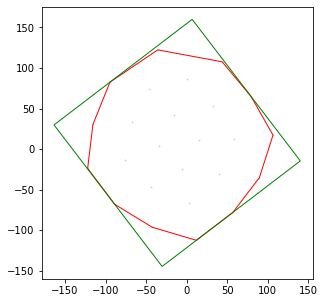

In [5]:
plt.figure(figsize=(5, 5))
it.fit(X_train_norm, plot=True)

(50, 50)

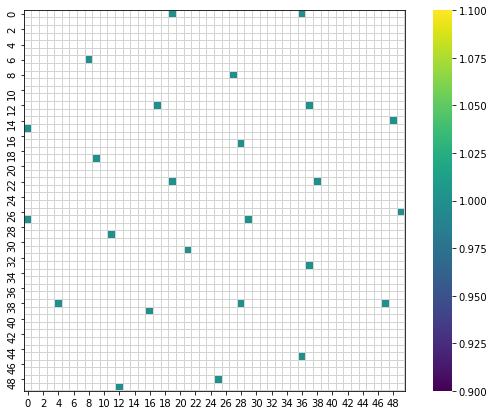

In [6]:
fdm = it.feature_density_matrix()
fdm[fdm == 0] = np.nan

plt.figure(figsize=(10, 7))

ax = sns.heatmap(fdm, cmap="viridis", linewidths=0.01, 
                 linecolor="lightgrey", square=True)
for _, spine in ax.spines.items():
    spine.set_visible(True)
    
fdm.shape


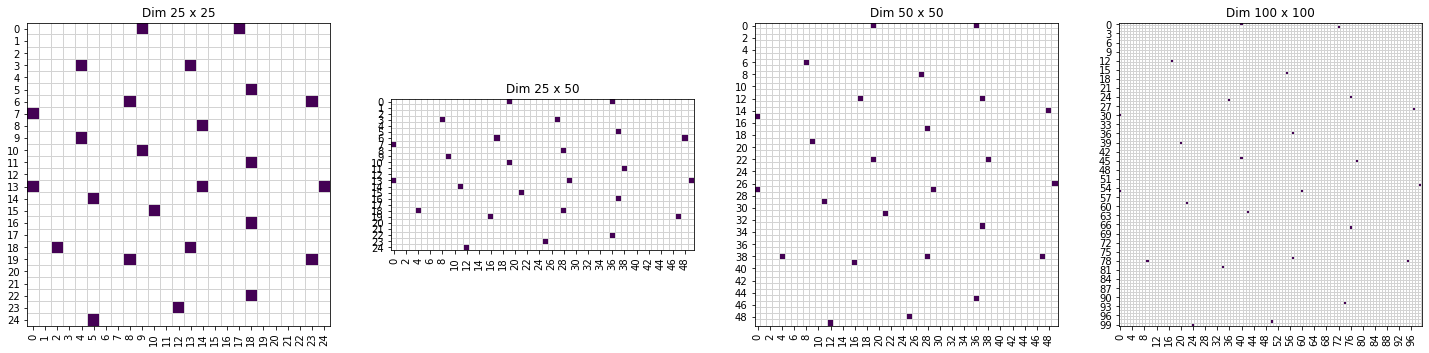

In [7]:
px_sizes = [25, (25, 50), 50, 100]

fig, ax = plt.subplots(1, len(px_sizes), figsize=(25, 7))
for ix, px in enumerate(px_sizes):
    it.pixels = px
    fdm = it.feature_density_matrix()
    fdm[fdm == 0] = np.nan
    cax = sns.heatmap(fdm, cmap="viridis", linewidth=0.01, 
                      linecolor="lightgrey", square=True, 
                      ax=ax[ix], cbar=False)
    cax.set_title('Dim {} x {}'.format(*it.pixels))
    for _, spine in cax.spines.items():
        spine.set_visible(True)

it.pixels = 50

In [8]:
mat_train = it.transform(X_train_norm)
print(mat_train.shape)
mat_train

(612, 50, 50, 3)


array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [9]:
mat_test = it.transform(X_test_norm)


In [10]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [3 4 5 6 7]


Text(0.5, 1.0, 'Ground Truth : 5')

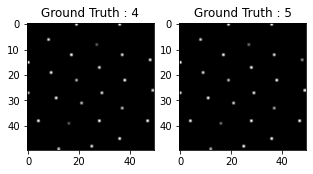

In [11]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(mat_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_train[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(mat_test[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_test[0]))



Text(0.5, 1.0, 'Ground Truth : 5')

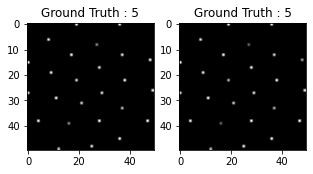

In [12]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(mat_train[300,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_train[300]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(mat_test[11,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_test[11]))


Text(0.5, 1.0, 'Ground Truth : 6')

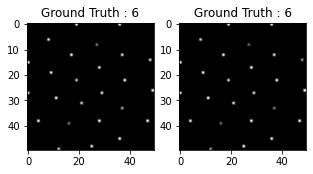

In [13]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(mat_train[209,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_train[209]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(mat_test[30,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_test[30]))




In [14]:
train_X = mat_train
test_X = mat_test
train_X.shape, test_X.shape



((612, 50, 50, 3), (68, 50, 50, 3))

In [15]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [16]:

train_Y = y_train
test_Y =y_test
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])
print('Original label:', train_Y[300])
print('After conversion to one-hot:', train_Y_one_hot[300])
print('Original label:', train_Y[109])
print('After conversion to one-hot:', train_Y_one_hot[109])

Original label: 4
After conversion to one-hot: [0. 0. 0. 0. 1. 0. 0. 0.]
Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0.]
Original label: 6
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 1. 0.]


In [17]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.1, random_state=13)


In [18]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((550, 50, 50, 3), (62, 50, 50, 3), (550, 8), (62, 8))

In [42]:
batch_size = 64
epochs = 100
num_classes = 8


In [ ]:

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(50,50,3),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

fashion_model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model.summary()

fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 50, 50, 32)        896       
_________________________________________________________________
leaky_re_lu_46 (LeakyReLU)   (None, 50, 50, 32)        0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
leaky_re_lu_47 (LeakyReLU)   (None, 25, 25, 64)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 13, 13, 128)     

9/9 [==============================] - 2s 262ms/step - loss: 1.1623 - accuracy: 0.5364 - val_loss: 1.1566 - val_accuracy: 0.5323
Epoch 45/100
9/9 [==============================] - 2s 252ms/step - loss: 1.1545 - accuracy: 0.5364 - val_loss: 1.1414 - val_accuracy: 0.5323
Epoch 46/100
9/9 [==============================] - 2s 240ms/step - loss: 1.1553 - accuracy: 0.5364 - val_loss: 1.1544 - val_accuracy: 0.5323
Epoch 47/100
9/9 [==============================] - 2s 243ms/step - loss: 1.1535 - accuracy: 0.5364 - val_loss: 1.1368 - val_accuracy: 0.5323
Epoch 48/100
9/9 [==============================] - 2s 233ms/step - loss: 1.1526 - accuracy: 0.5364 - val_loss: 1.1484 - val_accuracy: 0.5323
Epoch 49/100
9/9 [==============================] - 2s 222ms/step - loss: 1.1480 - accuracy: 0.5364 - val_loss: 1.1418 - val_accuracy: 0.5323
Epoch 50/100
9/9 [==============================] - 2s 239ms/step - loss: 1.1499 - accuracy: 0.5364 - val_loss: 1.1388 - val_accuracy: 0.5323
Epoch 51/100
9/9 [=

In [41]:
top_model_weights_path = 'fc_model.h5'
import datetime
start = datetime.datetime.now()
model = Sequential() 
model.add(Flatten(input_shape=train_X.shape[1:])) 
model.add(Dense(100, activation=tensorflow.keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.5)) 
model.add(Dense(50, activation=tensorflow.keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
   optimizer=optimizers.RMSprop(lr=1e-4),
   metrics=['acc'])
history = model.fit(train_X, train_label, 
   epochs=100,
   batch_size=batch_size, 
   validation_data=(valid_X, valid_label))
model.save_weights(top_model_weights_path)
(eval_loss, eval_accuracy) = model.evaluate( 
    valid_X, valid_label, batch_size=batch_size,     verbose=1)
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100)) 
print("[INFO] Loss: {}".format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Epoch 1/100
9/9 [==============================] - 0s 26ms/step - loss: 2.0735 - acc: 0.5091 - val_loss: 2.0674 - val_acc: 0.5323
Epoch 2/100
9/9 [==============================] - 0s 11ms/step - loss: 2.0646 - acc: 0.5364 - val_loss: 2.0594 - val_acc: 0.5323
Epoch 3/100
9/9 [==============================] - 0s 11ms/step - loss: 2.0565 - acc: 0.5364 - val_loss: 2.0515 - val_acc: 0.5323
Epoch 4/100
9/9 [==============================] - 0s 12ms/step - loss: 2.0478 - acc: 0.5364 - val_loss: 2.0429 - val_acc: 0.5323
Epoch 5/100
9/9 [==============================] - 0s 12ms/step - loss: 2.0393 - acc: 0.5364 - val_loss: 2.0344 - val_acc: 0.5323
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 2.0305 - acc: 0.5364 - val_loss: 2.0250 - val_acc: 0.5323
Epoch 7/100
9/9 [==============================] - 0s 11ms/step - loss: 2.0202 - acc: 0.5364 - val_loss: 2.0153 - val_acc: 0.5323
Epoch 8/100
9/9 [==============================] - 0s 10ms/step - loss: 2.0105 - acc: 0.53

9/9 [==============================] - 0s 11ms/step - loss: 1.3425 - acc: 0.5364 - val_loss: 1.3230 - val_acc: 0.5323
Epoch 64/100
9/9 [==============================] - 0s 12ms/step - loss: 1.3436 - acc: 0.5364 - val_loss: 1.3179 - val_acc: 0.5323
Epoch 65/100
9/9 [==============================] - 0s 12ms/step - loss: 1.3395 - acc: 0.5364 - val_loss: 1.3132 - val_acc: 0.5323
Epoch 66/100
9/9 [==============================] - 0s 11ms/step - loss: 1.3482 - acc: 0.5364 - val_loss: 1.3086 - val_acc: 0.5323
Epoch 67/100
9/9 [==============================] - 0s 11ms/step - loss: 1.3360 - acc: 0.5364 - val_loss: 1.3039 - val_acc: 0.5323
Epoch 68/100
9/9 [==============================] - 0s 12ms/step - loss: 1.3222 - acc: 0.5364 - val_loss: 1.2994 - val_acc: 0.5323
Epoch 69/100
9/9 [==============================] - 0s 12ms/step - loss: 1.3277 - acc: 0.5364 - val_loss: 1.2952 - val_acc: 0.5323
Epoch 70/100
9/9 [==============================] - 0s 12ms/step - loss: 1.2998 - acc: 0.5364 - 